# Projeto Final

### Importanto a biblioteca requests

In [1]:
import requests as r 
import pandas as pd

In [2]:
url = 'https://api.covid19api.com/dayone/country/brazil' #salvando em uma variável o endereço da api
resp = r.get(url) #requisitando as informações da api (url) utilizando o método get da biblioteca requests

In [3]:
resp.status_code #verificando se está funcionando (200 = ok)

200

In [4]:
# Atribuindo uma variável (raw_data) para *salvar* os dados brutos requisitados com a variável resp e o método .json()
raw_data = resp.json()
raw_data

[{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-02-26T00:00:00Z'},
 {'ID': '3489e1fd-c6b7-4cd1-b385-55c1eac25928',
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-02-27T00:00:00Z'},
 {'ID': 'f75ec5b9-1d0e-4bc0-9c9f-1046234d2a71',
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-02-28T00:00:00Z'},
 {'ID': 'caf0fef2-67a2-44d0-8ca7-e4fba1113fbd',
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat'

In [5]:
#Transformando o json em DataFrame e verificando como ele se comporta
df = pd.DataFrame(raw_data)
df

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,63aa488e-b4a2-4fcd-ae15-07c1ff219903,Brazil,BR,,,,-14.24,-51.93,1,0,0,1,2020-02-26T00:00:00Z
1,3489e1fd-c6b7-4cd1-b385-55c1eac25928,Brazil,BR,,,,-14.24,-51.93,1,0,0,1,2020-02-27T00:00:00Z
2,f75ec5b9-1d0e-4bc0-9c9f-1046234d2a71,Brazil,BR,,,,-14.24,-51.93,1,0,0,1,2020-02-28T00:00:00Z
3,caf0fef2-67a2-44d0-8ca7-e4fba1113fbd,Brazil,BR,,,,-14.24,-51.93,2,0,0,2,2020-02-29T00:00:00Z
4,6ecf37e8-7113-428a-a568-8aaee6f9e722,Brazil,BR,,,,-14.24,-51.93,2,0,0,2,2020-03-01T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,fe90adf3-4add-4788-89a3-ee28e9da9924,Brazil,BR,,,,-14.24,-51.93,19632443,548340,17475091,1609012,2021-07-23T00:00:00Z
514,f96313cc-473f-42b2-b6f3-a325e9bed9da,Brazil,BR,,,,-14.24,-51.93,19670534,549448,17656625,1464461,2021-07-24T00:00:00Z
515,35453bf1-3e59-4239-9d8b-cc4c066d8431,Brazil,BR,,,,-14.24,-51.93,19688663,549924,17702038,1436701,2021-07-25T00:00:00Z
516,c95e4000-5433-4e99-986a-effffbab5855,Brazil,BR,,,,-14.24,-51.93,19707662,550502,17704701,1452459,2021-07-26T00:00:00Z


In [6]:
#Mantendo somente as colunas importantes para a análise
df = df[['Confirmed', 'Deaths', 'Recovered', 'Date']]
df

,Confirmed,Deaths,Recovered,Date
0,1,0,0,2020-02-26T00:00:00Z
1,1,0,0,2020-02-27T00:00:00Z
2,1,0,0,2020-02-28T00:00:00Z
3,2,0,0,2020-02-29T00:00:00Z
4,2,0,0,2020-03-01T00:00:00Z
...,...,...,...,...
513,19632443,548340,17475091,2021-07-23T00:00:00Z
514,19670534,549448,17656625,2021-07-24T00:00:00Z
515,19688663,549924,17702038,2021-07-25T00:00:00Z
516,19707662,550502,17704701,2021-07-26T00:00:00Z


In [7]:
#Renomeando as columas em português e tirando os caracteres não importantes da data
df=df.rename(columns = {'Confirmed': 'Confirmados', 'Deaths': 'Óbitos', 'Recovered': 'Recuperados', 'Date': 'Data'})
for i in range(0, len(df)):
    df.iloc[i,3] = df.iloc[i,3][:10] 

In [8]:
import datetime as dt #importando a biblioteca nativa datetime
for i in range(0, len(df)): #iterando todos os elementos 
    df.iloc[i,3] = dt.datetime.strptime(df.iloc[i,3], '%Y-%m-%d') #transforma para um formato de data
    df.iloc[i,3] = df.iloc[i,3].strftime('%d/%m/%Y') #transforma para o formato de datas usual no BR.

# PARTE 2 

<h2> Usando matplotlib para plotar </h2>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':14})

In [10]:
#Selecionando os dados a serem plotados

datas = []
confirmados = []
recuperados = []
teste = [0, 2, 3, 4, 5, 6, 7, 8]

for i in range(0,len(df),45):
    datas.append(df.iloc[i,3])  
    confirmados.append(df.iloc[i,0]//1000) #dividi por 1000 para colocar em milhares
    recuperados.append(df.iloc[i,2]//1000)
    

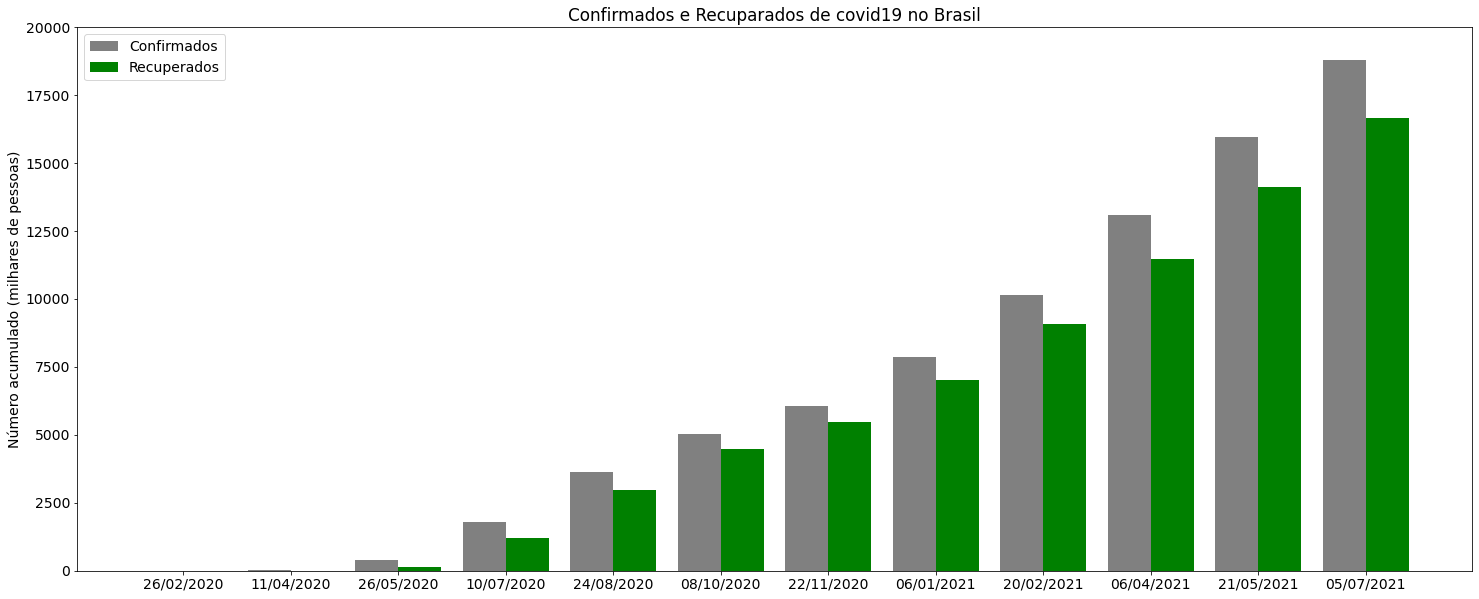

In [11]:
x = np.arange(len(datas))  # local label
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize = (25,10))

#setando as barras

rects1 = ax.bar(x - width/2, confirmados, width, label='Confirmados', color = 'gray')
rects2 = ax.bar(x + width/2, recuperados, width, label='Recuperados', color = 'green')

ax.set_ylabel('Número acumulado (milhares de pessoas)')
ax.set_title('Confirmados e Recuparados de covid19 no Brasil')

ax.legend()

ax.set_ylim([0, 20000]) #intervalo do eixo y

ax.set_xticks(x)
ax.set_xticklabels(datas)

plt.savefig('grafico_brcovid.png', dpi = 600) #salvando a imagem
plt.show()    